<a href="https://colab.research.google.com/github/AIRutuja/SVD_Project/blob/main/SVD_Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Here I have mount the goggle drive means I have used goggle colab here to fetch the data as , data is very large in size
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# combined_data_1.txt : this file is having movies_id , customer_id , Ratings (these columns are present in this dataset)
# movie_titles.csv : this file is having Name_of_movie which is associated with movie_id column in combined_data_1.txt dataset.

In [ ]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt' ,header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
netflix_dataset.columns

Index(['Cust_Id', 'Rating'], dtype='object')

In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
# Cust_Id is the object data type because with the numerical value yo have (i.e. 1:) , this special colon is present

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
# get the customer count with NaN values

movie_count = netflix_dataset.isnull().sum()
movie_count =movie_count["Rating"]

In [ ]:
# Here in netflix_dataset whenever their is 1: NaN (i.e. how many movies are their in total that much Null values will be present.)
movie_count

4499

In [ ]:
# to find how many customers we are having in dataset
# here nunique means , how many unique customers are present in your dataset

customer_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:
# In netflix datset movieid is present and then cust_id and it's respective rating , we purely want the customer of the netflix_dataset ,
# so need to substract movie count from it.

In [ ]:
customer_count = customer_count - movie_count
customer_count

470758

In [ ]:
#get the total number of ratings given by the customers in netflix_dataset
# here also in ratings column as well Nan Values are present so in order eleminate that need to minus (movie_count)

rating_count = netflix_dataset['Cust_Id'].count()- movie_count
rating_count

24053764

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# here in output we can see , how many times we have rated for total_data 1 star , 2 star and so on...

stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


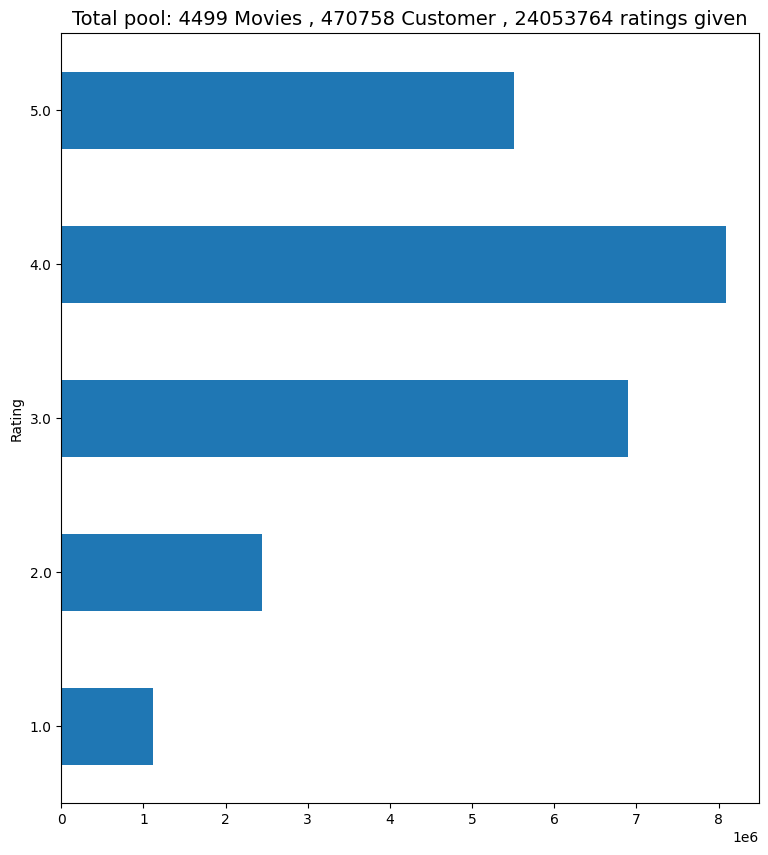

In [ ]:
b = stars.plot(kind = 'barh' , legend = False , figsize=(9,10))
plt.title(f'Total pool: {movie_count} Movies , {customer_count} Customer , {rating_count} ratings given', fontsize=14)
plt.grid = (True)

In [ ]:
# As in the netflix_dataset their is Cust_id and Rating and in Cust_id whenever their is movie_id w.r.t that in Rating column Nan value is present ,
# so we are movie_id column , so that whenever their is the Cust_id refer to 1 movie_id it will return you 1 there.
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column

In [ ]:
df_null = pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_null

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_null = df_null[df_null['Rating']== True]
df_null

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_null.shape

(4499, 1)

In [ ]:
df_null.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_null.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [ ]:
#now we will reset the index as the column

df_null = df_null.reset_index()
df_null

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on

movie_np = []
movie_id = 1

for i, j in zip(df_null['index'][1:], df_null['index'][:-1]):
  y = np.full((1 , i-j-1), movie_id)
  movie_np = np.append(movie_np , y)
  movie_id +=1


# account for last record and corresponding length

last_record = np.full((1 , len(netflix_dataset) - df_null.iloc[-1,0]-1), movie_id) #movie id will be 4499
movie_np=np.append(movie_np, last_record)

In [ ]:
df_null['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_null['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
# Now we are adding one more column named as Movie_id , their where 1 column is mentioned their 1 will be written , and so on

In [ ]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


<ipython-input-32-212c787c0ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [ ]:
# dataset_movie_summary

In [ ]:
dataset_movie_summary_details = netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

dataset_movie_summary_details

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# the movies having less ratings count and the customers who have given the less ratings will not be considered

In [ ]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary_details.index=dataset_movie_summary.index.map(int)

In [ ]:
# here I am considering 70% of the whole data
dataset_movie_summary_details["count"].quantile(0.7)

1798.6

In [ ]:
# it is considered as benchmark for my dataset , at least movie should have 1799 ratings , for consideration

In [ ]:
#now we will create a benchmark

movie_benchmark = round(dataset_movie_summary_details['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [ ]:
# this tells for ex: for movie_id 1  total rating is 547

dataset_movie_summary_details['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [ ]:
drop_movie_list = dataset_movie_summary_details[dataset_movie_summary_details['count']<movie_benchmark].index
drop_movie_list

# considering only the movies whose ratings are less than the benchmark

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [ ]:
# Uptill now we have done for the RATINGS and also we have done group by on basis on Movie_Id , now let's do for the customers

In [ ]:
# it will give me count , that for how many times the customer has rated for movie for ex: customer having cust_id 10 has given rating for 49 times.

dataset_customer_summary_details = netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count'])
dataset_customer_summary_details

,count
Cust_Id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [ ]:
# setting benchmark for cust_id

cust_benchmark = round(dataset_customer_summary_details['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
# This is giving me list of all Cust_Id
drop_cust_list = dataset_customer_summary_details[dataset_customer_summary_details['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [ ]:
#we will remove all the customers and movies that are below the benchmark

print('The orignal dataframe has: ' , netflix_dataset.shape , 'shape')

The orignal dataframe has:  (24053764, 3) shape


In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# Now we will move towards movies_titles.csv data

In [ ]:
import pandas as pd

In [ ]:
movies_dataset = pd.read_csv("/content/drive/MyDrive/movie_titles.csv" , encoding = 'ISO-8859-1' , header=None ,
                             usecols = [0,1,2], names=['Movie_Id', 'Year', 'Name'])
movies_dataset.set_index('Movie_Id' , inplace=True)

In [ ]:
movies_dataset.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [ ]:
# For Singular Value Decomposition(SVD) we need to install scikit-surprise ,SVD is present in it

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162726 sha256=29cbec895b5cf970cef1823665e94fb87dd991e5b1b4444dba25e1c12e187171
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# model building

import math
import seaborn as sns
from surprise import Reader, Dataset , SVD
# Reader is used to read the dataset for SVD algorythm
# Dataset class is used to load and manage the datsets
# cross_validate : It is used to enhance the accuracy , to boost the model (for ex: if cross_validate = 3 So it will
#divide it in 3 half parts of data , from that 1 half used for testing purpose and 2 half used for train the data. )
from surprise.model_selection import cross_validate


In [ ]:
# Here I am calling instance of Reader class
reader = Reader()

In [ ]:
#we only work with top 50K rows for quick runtime

data=Dataset.load_from_df(netflix_dataset[:50000], reader)

In [ ]:
data

In [ ]:
# MEA : Mean Absolute Error
# Whichever Module is showing least RMSE and MEA

In [ ]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)

{'test_rmse': array([16.98897774, 16.89819028, 17.00235211]),
 'test_mae': array([15.06338989, 14.96881074, 15.09258061]),
 'fit_time': (0.7715041637420654, 0.6476325988769531, 0.6509778499603271),
 'test_time': (0.22598648071289062, 0.08968806266784668, 0.07619595527648926)}

In [ ]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *

dataset_10000 = netflix_dataset[(netflix_dataset['Cust_Id'] == "10000" )] & (netflix_dataset['Rating']==5)

dataset_10000

,696,697,698,699,700,701,703,704,705,706,...,24056839,24056840,24056841,24056842,24056843,24056845,24056846,Cust_Id,Movie_Id,Rating


In [ ]:
movies_dataset

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change the values in the copied dataset, not in the actual dataset

user_10000 = movies_dataset.copy()

user_10000

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_10000 = user_10000.reset_index()

user_10000

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_10000 = user_10000[~user_10000['Movie_Id'].isin(drop_movie_list)]

user_10000

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Now we are going to each and every Movie_id for that particular user which we took randomly i.e. user_10000 , this user has given to ratings as 5 to some
# movies , apart from that we are going to each and every Movie_id and according to svd algorythm we will predict the rating for each and every movie

In [ ]:
user_10000['Estimate Score'] = user_10000['Movie_Id'].apply ( lambda x : svd.predict(10000 , x ).est)

user_10000 = user_10000.drop('Movie_Id' , axis=1)

<ipython-input-71-c77d36d43b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_10000['Estimate Score'] = user_10000['Movie_Id'].apply ( lambda x : svd.predict(10000 , x ).est)


In [ ]:
user_10000 = user_10000.sort_values('Estimate Score')

print(user_10000)

         Year                                       Name  Estimate Score
2      1997.0                                  Character               5
12889  1976.0                                     Carrie               5
12890  2003.0                               24: Season 3               5
12891  1995.0                                      Smoke               5
12892  2004.0                       Driving Miss Wealthy               5
...       ...                                        ...             ...
8026   1980.0                                     Gloria               5
8027   1993.0                           White Lotus Cult               5
8028   2004.0         Dora the Explorer: Catch the Stars               5
8030   1986.0  Ken Burns' America: The Statue of Liberty               5
17769  2003.0                               Alien Hunter               5

[14621 rows x 3 columns]


In [ ]:
user_10000.head(10)

,Year,Name,Estimate Score
2,1997.0,Character,5
12889,1976.0,Carrie,5
12890,2003.0,24: Season 3,5
12891,1995.0,Smoke,5
12892,2004.0,Driving Miss Wealthy,5
12893,1960.0,The Time Machine,5
12894,1997.0,Ivanhoe,5
12895,1994.0,Bullets Over Broadway,5
12896,2002.0,Unspeakable,5
12897,1989.0,Fright Night Part II,5


In [ ]:
user_10000 = user_10000.sort_values('Estimate Score' , ascending=False)

print(user_10000.head(10000))

         Year                            Name  Estimate Score
2      1997.0                       Character               5
15     1996.0                       Screamers               5
17     1994.0                Immortal Beloved               5
25     2004.0                 Never Die Alone               5
27     2002.0                 Lilo and Stitch               5
...       ...                             ...             ...
13174  1992.0                      Rapid Fire               5
13086  2004.0  A Home at the End of the World               5
13175  2002.0                         Respiro               5
13147  1995.0               Anatomy of Desire               5
13148  1940.0           Foreign Correspondent               5

[10000 rows x 3 columns]


In [ ]:
# Here we have end with the project of the netflix

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  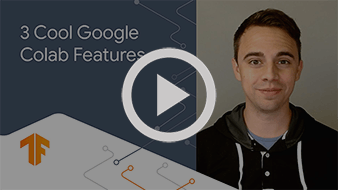
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

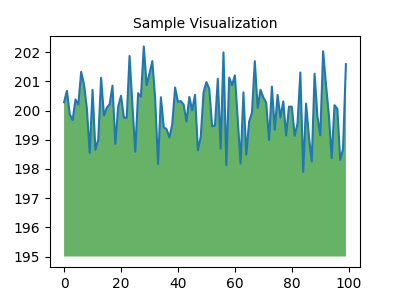

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
